In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from datetime import datetime 
from sklearn.datasets import load_iris

### 상관관계 시각화

In [6]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [8]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)
#tail 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
target_df = pd.DataFrame(data=iris.target, columns=['target'])
target_df.tail(3)

,target
147,2
148,2
149,2


In [13]:
target_df.loc[target_df['target'] == 0, 'target'] = 'setosa'
target_df.loc[target_df['target'] == 1, 'target'] = 'versicolor'
target_df.loc[target_df['target'] == 2, 'target'] = 'virginica'
target_df.head(3)

,target
0,setosa
1,setosa
2,setosa


In [14]:
target_df.tail(3)

,target
147,virginica
148,virginica
149,virginica


In [15]:
df = pd.concat([iris_df, target_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.columns = ['sepal_length',	'sepal_width', 'petal_length', 'petal_width',	'target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [24]:
def corr(df):
  plt.figure(figsize=(12, 10))
  sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu')
  plt.show()

========================[ setosa ]=========================


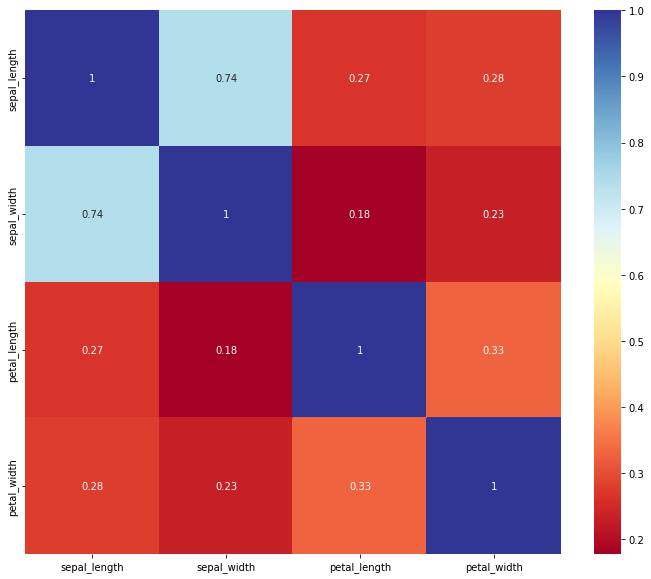

========================[ versicolor ]=========================


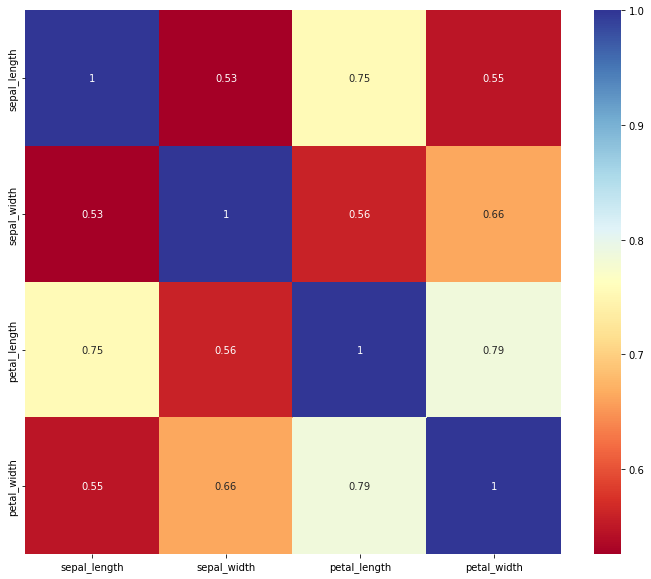

========================[ virginica ]=========================


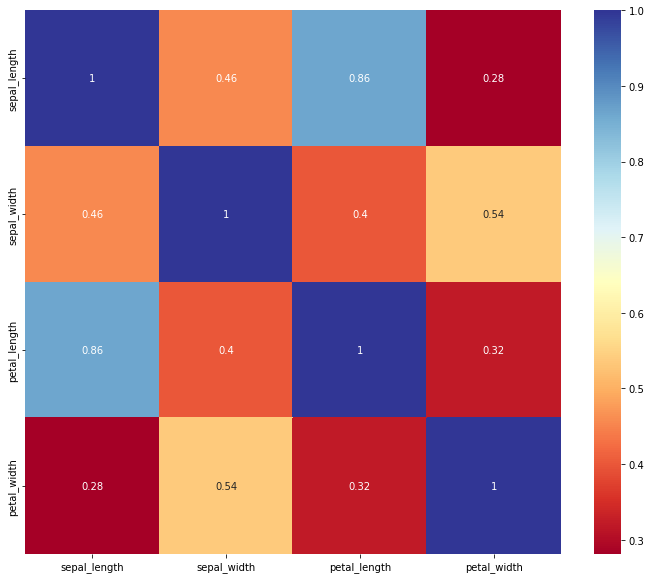

In [26]:
t_list = list(df['target'].unique())

for i in t_list:
  print("========================[", i, "]=========================" )
  corr(df.loc[df['target'] == i].iloc[:, 0:4])

### 유의성 검정

In [27]:
setosa_df = df.loc[df['target'] == 'virginica']
stats.pearsonr(x = setosa_df.petal_length, y = setosa_df.sepal_length)

(0.8642247329355762, 6.29778575890394e-16)

### 코호트 분석

In [28]:
df = pd.read_excel('/content/drive/MyDrive/data/cohort_data.xlsx')
df.head()

,order_date,user_id,charges
0,2009-12-18,75600,3254.4
1,2009-08-25,4622,3274.2
2,2009-09-15,14635,3284.1
3,2009-08-27,50406,3295.2
4,2010-01-03,229411,3295.8


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  2891 non-null   datetime64[ns]
 1   user_id     2891 non-null   int64         
 2   charges     2891 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 67.9 KB


In [30]:
df['order_date'] = df['order_date'].astype(str)
df['charges'] = df['charges'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_date  2891 non-null   object
 1   user_id     2891 non-null   int64 
 2   charges     2891 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.9+ KB


In [32]:
df.head(3)

,order_date,user_id,charges
0,2009-12-18,75600,3254
1,2009-08-25,4622,3274
2,2009-09-15,14635,3284


In [33]:
df['order_ym']  = df['order_date'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))

In [34]:
df.head()

,order_date,user_id,charges,order_ym
0,2009-12-18,75600,3254,2009-12
1,2009-08-25,4622,3274,2009-08
2,2009-09-15,14635,3284,2009-09
3,2009-08-27,50406,3295,2009-08
4,2010-01-03,229411,3295,2010-01


In [39]:
tmp_order_ym = pd.DataFrame(df.groupby('user_id').order_ym.min()).reset_index()
tmp_order_ym.columns = ['user_id', 'first_order_ym']
tmp_order_ym.head()

,user_id,first_order_ym
0,47,2009-01
1,95,2009-03
2,98,2009-01
3,112,2009-01
4,141,2009-11


In [40]:
df = pd.merge(df, tmp_order_ym, on=['user_id'], how='left')
df.head()

,order_date,user_id,charges,order_ym,first_order_ym
0,2009-12-18,75600,3254,2009-12,2009-09
1,2009-08-25,4622,3274,2009-08,2009-03
2,2009-09-15,14635,3284,2009-09,2009-05
3,2009-08-27,50406,3295,2009-08,2009-08
4,2010-01-03,229411,3295,2010-01,2010-01


In [41]:
df.groupby(['first_order_ym', 'order_ym']).user_id.nunique()

first_order_ym  order_ym
2009-01         2009-01      22
                2009-02       8
                2009-03      10
                2009-04       9
                2009-05      10
                           ... 
2010-01         2010-02      50
                2010-03      26
2010-02         2010-02     100
                2010-03      19
2010-03         2010-03      24
Name: user_id, Length: 119, dtype: int64

In [51]:
df['month_diff'] = round((df['order_ym'].map(lambda x : datetime.strptime(x, '%Y-%m')) - df['first_order_ym'].map(lambda x : datetime.strptime(x, '%Y-%m')))/ np.timedelta64(1, 'M')).astype(int)

In [52]:
df.head()

,order_date,user_id,charges,order_ym,first_order_ym,month_diff
0,2009-12-18,75600,3254,2009-12,2009-09,3
1,2009-08-25,4622,3274,2009-08,2009-03,5
2,2009-09-15,14635,3284,2009-09,2009-05,4
3,2009-08-27,50406,3295,2009-08,2009-08,0
4,2010-01-03,229411,3295,2010-01,2010-01,0


In [53]:
pd.pivot_table(df, columns='month_diff', index='first_order_ym', values='charges', aggfunc='sum')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_order_ym,,,,,,,,,,,,,,,
2009-01,1083202.0,1019791.0,941444.0,988577.0,1133649.0,958640.0,1044532.0,674959.0,1069337.0,392243.0,792653.0,1068427.0,969223.0,529483.0,371588.0
2009-02,482621.0,179967.0,199006.0,53360.0,296605.0,512598.0,314175.0,432239.0,175408.0,69726.0,263196.0,156004.0,211911.0,NaN,NaN
2009-03,612941.0,125890.0,702215.0,580165.0,161250.0,291010.0,713661.0,582325.0,287400.0,244196.0,317386.0,386941.0,76310.0,NaN,NaN
2009-04,2094321.0,1189580.0,901049.0,840673.0,474010.0,414855.0,209446.0,339113.0,147325.0,445544.0,516597.0,161698.0,NaN,NaN,NaN
2009-05,2627560.0,1229480.0,648209.0,263168.0,309408.0,389060.0,195830.0,420283.0,223568.0,504647.0,81827.0,NaN,NaN,NaN,NaN
2009-06,1349320.0,1040226.0,519115.0,563346.0,381797.0,182910.0,40965.0,195803.0,493841.0,162120.0,NaN,NaN,NaN,NaN,NaN
2009-07,2640644.0,1707315.0,1312847.0,721724.0,833466.0,398981.0,679546.0,909236.0,420592.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,1960261.0,1183446.0,907426.0,621384.0,382474.0,716112.0,269742.0,249054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1691827.0,2004985.0,1130603.0,937133.0,1216455.0,1072309.0,479581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
cohort_month = pd.pivot_table(df, columns='month_diff', index='first_order_ym', values='charges', aggfunc='sum').fillna(0).astype(int)
cohort_month

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_order_ym,,,,,,,,,,,,,,,
2009-01,1083202,1019791,941444,988577,1133649,958640,1044532,674959,1069337,392243,792653,1068427,969223,529483,371588
2009-02,482621,179967,199006,53360,296605,512598,314175,432239,175408,69726,263196,156004,211911,0,0
2009-03,612941,125890,702215,580165,161250,291010,713661,582325,287400,244196,317386,386941,76310,0,0
2009-04,2094321,1189580,901049,840673,474010,414855,209446,339113,147325,445544,516597,161698,0,0,0
2009-05,2627560,1229480,648209,263168,309408,389060,195830,420283,223568,504647,81827,0,0,0,0
2009-06,1349320,1040226,519115,563346,381797,182910,40965,195803,493841,162120,0,0,0,0,0
2009-07,2640644,1707315,1312847,721724,833466,398981,679546,909236,420592,0,0,0,0,0,0
2009-08,1960261,1183446,907426,621384,382474,716112,269742,249054,0,0,0,0,0,0,0
2009-09,1691827,2004985,1130603,937133,1216455,1072309,479581,0,0,0,0,0,0,0,0


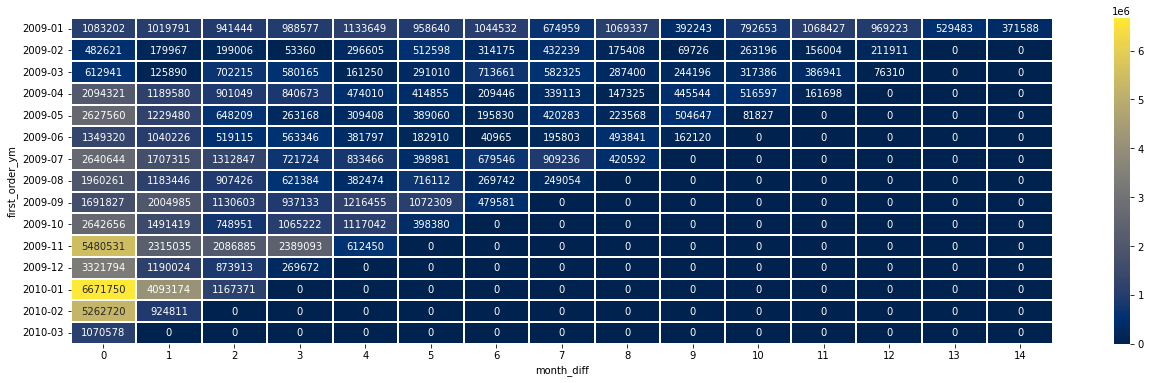

In [55]:
plt.figure(figsize=(22, 6))
ax = sns.heatmap(cohort_month, annot=True, fmt='d', linewidths = 1, cmap='cividis')

In [56]:
cohort_month_user = pd.pivot_table(df, columns='month_diff', index='first_order_ym', values='user_id', aggfunc=lambda x: len(x.unique())).fillna(0).astype(int)
cohort_month_user

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_order_ym,,,,,,,,,,,,,,,
2009-01,22,8,10,9,10,8,8,7,7,7,7,8,11,7,6
2009-02,15,3,5,1,4,4,4,5,5,4,3,3,5,0,0
2009-03,13,4,5,4,1,2,2,3,2,1,3,2,1,0,0
2009-04,39,13,10,13,6,7,4,6,2,4,3,2,0,0,0
2009-05,50,13,12,5,4,6,3,5,5,4,3,0,0,0,0
2009-06,32,15,9,6,7,5,3,3,10,3,0,0,0,0,0
2009-07,50,23,13,10,11,10,11,7,7,0,0,0,0,0,0
2009-08,31,11,9,7,6,8,4,4,0,0,0,0,0,0,0
2009-09,37,15,14,8,13,9,8,0,0,0,0,0,0,0,0


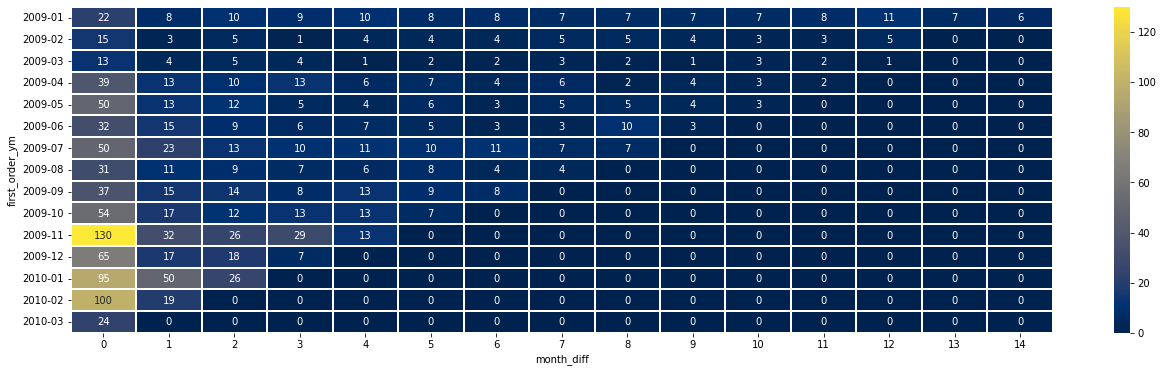

In [57]:
plt.figure(figsize=(22, 6))
ax = sns.heatmap(cohort_month_user, annot=True, fmt='d', linewidths = 1, cmap='cividis')

In [58]:
asp_df = round(cohort_month/cohort_month_user).fillna(0).astype(int)
asp_df

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_order_ym,,,,,,,,,,,,,,,
2009-01,49236,127474,94144,109842,113365,119830,130566,96423,152762,56035,113236,133553,88111,75640,61931
2009-02,32175,59989,39801,53360,74151,128150,78544,86448,35082,17432,87732,52001,42382,0,0
2009-03,47149,31472,140443,145041,161250,145505,356830,194108,143700,244196,105795,193470,76310,0,0
2009-04,53701,91506,90105,64667,79002,59265,52362,56519,73662,111386,172199,80849,0,0,0
2009-05,52551,94575,54017,52634,77352,64843,65277,84057,44714,126162,27276,0,0,0,0
2009-06,42166,69348,57679,93891,54542,36582,13655,65268,49384,54040,0,0,0,0,0
2009-07,52813,74231,100988,72172,75770,39898,61777,129891,60085,0,0,0,0,0,0
2009-08,63234,107586,100825,88769,63746,89514,67436,62264,0,0,0,0,0,0,0
2009-09,45725,133666,80757,117142,93573,119145,59948,0,0,0,0,0,0,0,0


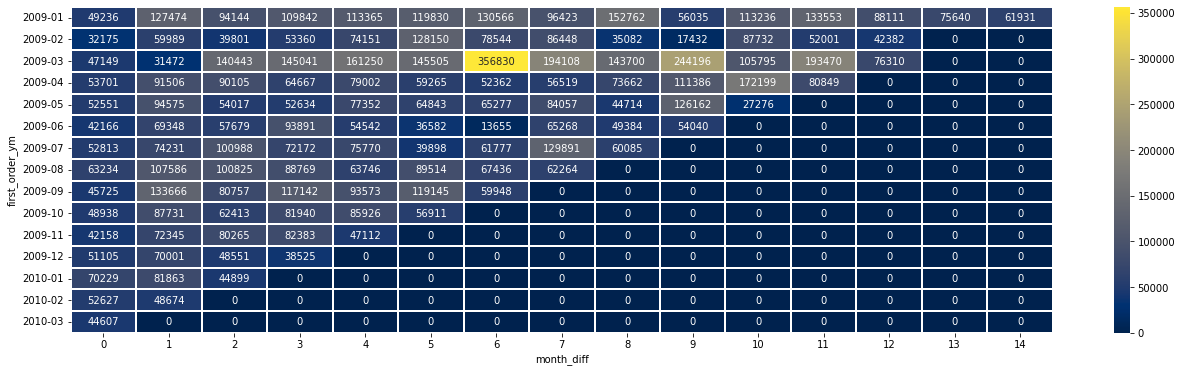

In [59]:
plt.figure(figsize=(22, 6))
ax = sns.heatmap(asp_df, annot=True, fmt='d', linewidths = 1, cmap='cividis')